In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

sns.set(style="whitegrid")

## Đọc dữ liệu

In [4]:
print("Đọc dữ liệu từ file CSV...")
df = pd.read_csv("../datasets/preprocessing_data/clean_data.csv")  # Giả định file nằm cùng thư mục notebook

Đọc dữ liệu từ file CSV...


## Tổng quan dữ liệu
- Xem 5 dòng đầu  tiên của dữ liệu
- Thông tin tổng quan về kiểu dữ liệu và số lượng giá trị không null
- Thống kê mô tả các cột số
- Kiểu dữ liệu từng cột

In [5]:
print("1. Kích thước dữ liệu:", df.shape)
print("\n2. 5 dòng đầu:")
display(df.head())

print("\n3. Thông tin dữ liệu:")
df.info()

print("\n4. Thống kê mô tả:")
display(df.describe(include='all'))

print("\n5. Kiểu dữ liệu từng cột:")
print(df.dtypes)

1. Kích thước dữ liệu: (37322, 2055)

2. 5 dòng đầu:


,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f2045,f2046,f2047,label,filename,class_name,class_fullname,split,PCA1,PCA2
0,-0.392888,3.493722,0.336179,-0.570688,1.046404,0.625931,-0.326789,-0.489770,-0.641081,-0.069784,...,-0.169599,-0.465814,0.235203,19,gorilla_10259.jpg,gorilla,gorilla,train,-10.520865,1.058651
1,-0.668500,2.436497,-0.639793,-0.634825,1.112746,2.052809,-0.632268,-0.493884,-0.608876,-0.603358,...,0.266059,-0.505717,-0.108181,34,weasel_10194.jpg,weasel,weasel,train,-7.086286,0.222523
2,0.163231,0.436661,-0.668206,-0.654104,-0.111441,0.092412,-0.836440,-0.441649,-0.147349,-0.481978,...,1.350432,-0.470118,-0.614212,2,killer+whale_10154.jpg,killer+whale,killer whale,train,-13.133718,0.793753
3,-0.414235,0.730631,-0.666131,-0.704741,4.079749,-0.688144,0.460517,-0.073035,-0.534476,-0.591607,...,-0.118752,-0.357169,-0.689378,17,humpback+whale_10306.jpg,humpback+whale,humpback whale,train,-11.866613,2.740873
4,-0.072048,-0.490216,-0.576980,-0.704741,2.056847,-0.613751,-0.549711,-0.544086,-0.391745,-0.374936,...,-0.089475,-0.516458,-0.552150,18,elephant_10660.jpg,elephant,elephant,train,-14.119399,-2.020351



3. Thông tin dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37322 entries, 0 to 37321
Columns: 2055 entries, f0 to PCA2
dtypes: float64(2050), int64(1), object(4)
memory usage: 585.1+ MB

4. Thống kê mô tả:


,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f2045,f2046,f2047,label,filename,class_name,class_fullname,split,PCA1,PCA2
count,3.732200e+04,3.732200e+04,3.732200e+04,3.732200e+04,3.732200e+04,3.732200e+04,3.732200e+04,3.732200e+04,3.732200e+04,3.732200e+04,...,3.732200e+04,3.732200e+04,3.732200e+04,37322.000000,37322,37322,37322,37322,3.732200e+04,3.732200e+04
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,37322,50,50,2,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,gorilla_10259.jpg,horse,horse,train,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,1645,1645,29857,NaN,NaN
mean,-3.595930e-15,-4.575254e-15,-8.620485e-16,2.832880e-15,1.794158e-15,-1.449947e-15,-4.575254e-15,-2.113999e-15,3.893687e-15,-2.768912e-15,...,-1.608345e-15,1.909910e-15,-3.685791e-16,25.472670,NaN,NaN,NaN,NaN,2.631837e-15,-2.924264e-16
std,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,...,1.000013e+00,1.000013e+00,1.000013e+00,14.268285,NaN,NaN,NaN,NaN,1.043211e+01,8.027827e+00
min,-6.685005e-01,-9.541530e-01,-6.682058e-01,-7.047409e-01,-6.270947e-01,-7.443346e-01,-8.990476e-01,-5.440861e-01,-6.410814e-01,-6.033579e-01,...,-8.161512e-01,-5.164576e-01,-6.893776e-01,0.000000,NaN,NaN,NaN,NaN,-1.854560e+01,-2.178313e+01
25%,-6.236489e-01,-7.360076e-01,-6.279407e-01,-6.296237e-01,-5.980070e-01,-6.706915e-01,-7.303613e-01,-5.190790e-01,-5.831503e-01,-5.397690e-01,...,-7.253566e-01,-4.808424e-01,-6.313678e-01,14.000000,NaN,NaN,NaN,NaN,-7.417671e+00,-5.837425e+00
50%,-3.878596e-01,-3.073928e-01,-3.954947e-01,-3.904858e-01,-4.210980e-01,-3.940521e-01,-3.356968e-01,-3.743763e-01,-3.735588e-01,-3.324707e-01,...,-3.814227e-01,-3.355656e-01,-3.728787e-01,26.000000,NaN,NaN,NaN,NaN,-1.902380e+00,-1.698441e-01
75%,2.165947e-01,4.197256e-01,2.092164e-01,2.045445e-01,1.468407e-01,2.822995e-01,4.007506e-01,7.069278e-02,1.479281e-01,1.201015e-01,...,3.724464e-01,2.826968e-02,2.076700e-01,38.000000,NaN,NaN,NaN,NaN,4.978023e+00,5.543774e+00



5. Kiểu dữ liệu từng cột:
f0                float64
f1                float64
f2                float64
f3                float64
f4                float64
                   ...   
class_name         object
class_fullname     object
split              object
PCA1              float64
PCA2              float64
Length: 2055, dtype: object


## Kiểm tra số lượng giá trị thiếu và các dòng bị trùng lặp

In [6]:
print("\n6. Số lượng giá trị thiếu:")
missing = df.isnull().sum()
print(missing[missing > 0])

print("\n7. Dòng bị trùng:", df.duplicated().sum())


6. Số lượng giá trị thiếu:
Series([], dtype: int64)

7. Dòng bị trùng: 0


##  Phân tích phân phối đặc trưng và phân bố lớp

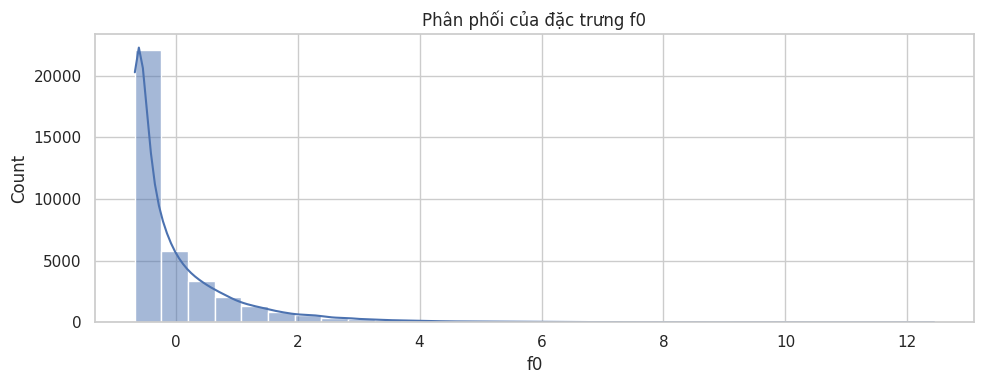

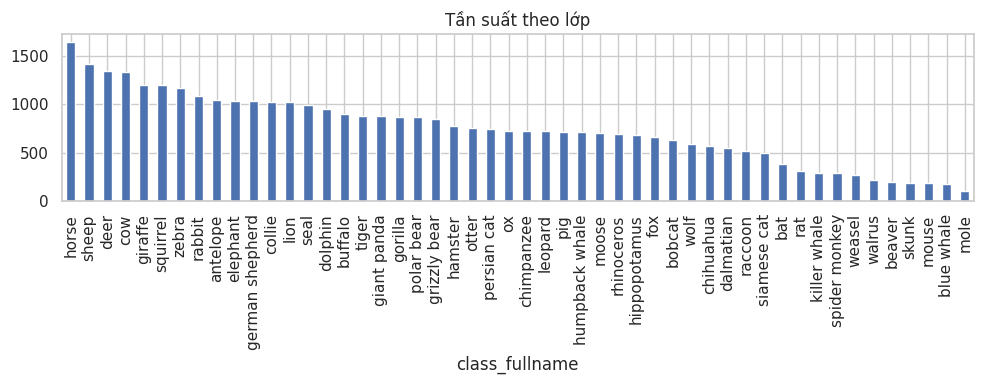

In [ ]:
# Phân phối của đặc trưng f0
plt.figure(figsize=(10, 4))
sns.histplot(df['f0'], bins=30, kde=True)
plt.title("Phân phối của đặc trưng f0")
plt.tight_layout()
plt.show()

# Tần suất mẫu trong từng lớp
plt.figure(figsize=(10, 4))
df['class_fullname'].value_counts().plot(kind='bar')
plt.title("Tần suất theo lớp")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Phân tích ngoại lai và phân phối đặc trưng theo tập dữ liệu

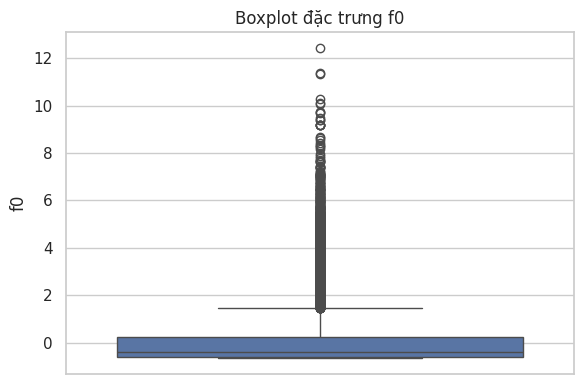

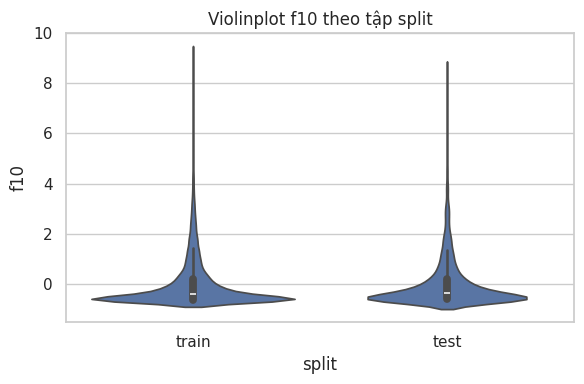

In [ ]:
# Boxplot cho đặc trưng f0
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, y='f0')
plt.title("Boxplot đặc trưng f0")
plt.tight_layout()
plt.show()

# So sánh đặc trưng f10 giữa tập train và test bằng violinplot
plt.figure(figsize=(6, 4))
sns.violinplot(data=df, x='split', y='f10')
plt.title("Violinplot f10 theo tập split")
plt.tight_layout()
plt.show()


## Ma trận tương quan giữa các đặc trưng

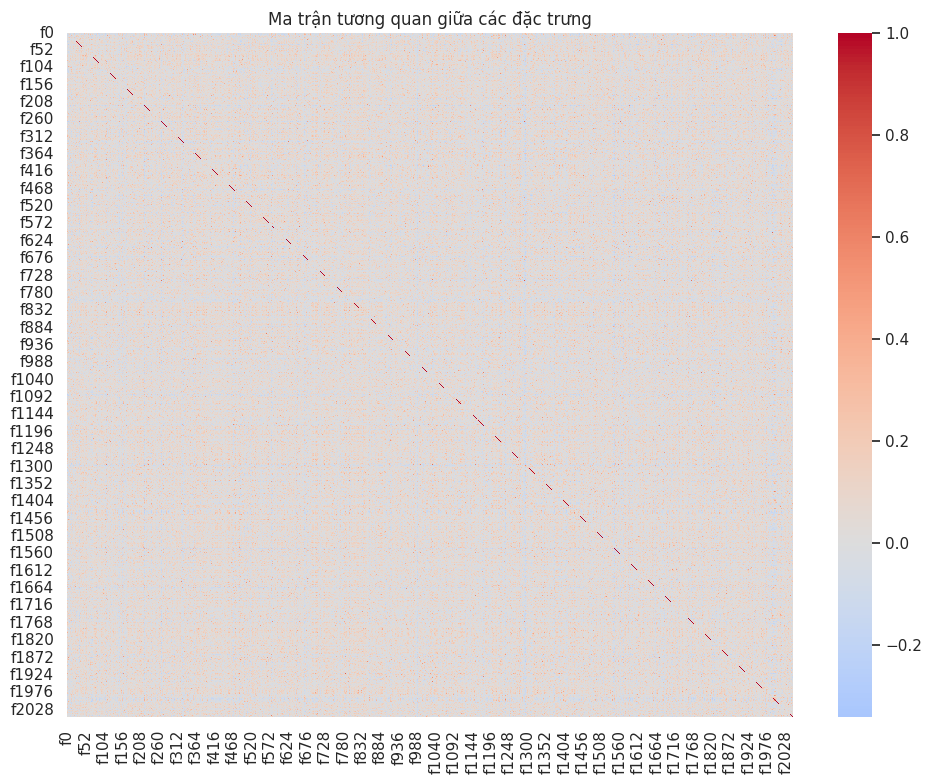

In [9]:
feature_cols = [col for col in df.columns if col.startswith('f') and col[1:].isdigit()]

plt.figure(figsize=(10, 8))
sns.heatmap(df[feature_cols].corr(), cmap='coolwarm', center=0)
plt.title("Ma trận tương quan giữa các đặc trưng")
plt.tight_layout()
plt.show()

In [14]:
# Tính toán ma trận tương quan giữa các đặc trưng
correlation_matrix = df[feature_cols].corr()

# Hiển thị ma trận tương quan dưới dạng bảng số
print("Ma trận tương quan giữa các đặc trưng:")
print(correlation_matrix)


Ma trận tương quan giữa các đặc trưng:
             f0        f1        f2        f3        f4        f5        f6  \
f0     1.000000 -0.040040  0.131048  0.057177 -0.072990 -0.007833  0.006401   
f1    -0.040040  1.000000 -0.121044  0.060837  0.238072  0.047811  0.045810   
f2     0.131048 -0.121044  1.000000  0.040579 -0.159067  0.142885  0.165951   
f3     0.057177  0.060837  0.040579  1.000000 -0.136144 -0.045157  0.049791   
f4    -0.072990  0.238072 -0.159067 -0.136144  1.000000  0.082492  0.160989   
...         ...       ...       ...       ...       ...       ...       ...   
f2043 -0.042020  0.055085 -0.036439  0.065866  0.020645  0.034455  0.057973   
f2044 -0.037312  0.105926 -0.176045 -0.005722  0.136977 -0.056692 -0.006988   
f2045 -0.154787  0.060335 -0.152202 -0.158078  0.218522  0.048992  0.080238   
f2046  0.279333 -0.106426 -0.029152 -0.026651 -0.112534 -0.121576 -0.072477   
f2047  0.032022  0.072130  0.038704 -0.003808  0.050255  0.031965  0.018154   

            

## So sánh đặc trưng giữa các nhóm nhãn và tập dữ liệu

Trung bình đặc trưng theo label:


,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f2038,f2039,f2040,f2041,f2042,f2043,f2044,f2045,f2046,f2047
label,,,,,,,,,,,,,,,,,,,,,
0,-0.038765,-0.014391,-0.023486,-0.043783,0.034865,0.044281,-0.005627,0.031240,-0.067912,-0.008271,...,-0.021261,-0.046020,0.009628,-0.026983,-0.006137,-0.004560,0.005105,0.039479,-0.060224,0.038773
1,-0.039342,0.058456,0.010382,0.093404,0.029348,0.025240,0.059372,0.003196,0.018747,-0.050470,...,-0.002867,0.056309,-0.004728,-0.000989,-0.027506,0.019696,-0.006244,-0.003095,-0.061919,-0.007928
2,0.001166,-0.050412,-0.066379,-0.023163,0.036977,0.039100,0.032184,0.152512,0.016228,0.019555,...,-0.006400,-0.101261,-0.047363,-0.100360,-0.021698,0.094412,0.097371,0.035001,-0.003393,-0.018617
3,-0.074903,0.052616,0.002480,0.061816,-0.008889,0.009648,-0.070053,0.020989,-0.059287,0.092580,...,-0.048167,0.031323,-0.013422,-0.073314,0.028934,-0.083206,0.011262,0.026276,0.080920,-0.067362
4,-0.029864,0.043380,0.003031,-0.016016,0.003389,-0.036611,-0.046422,0.060436,0.013562,-0.030482,...,-0.080087,0.005997,-0.019265,-0.059345,-0.058275,0.027977,0.026367,-0.004081,0.003979,-0.014823


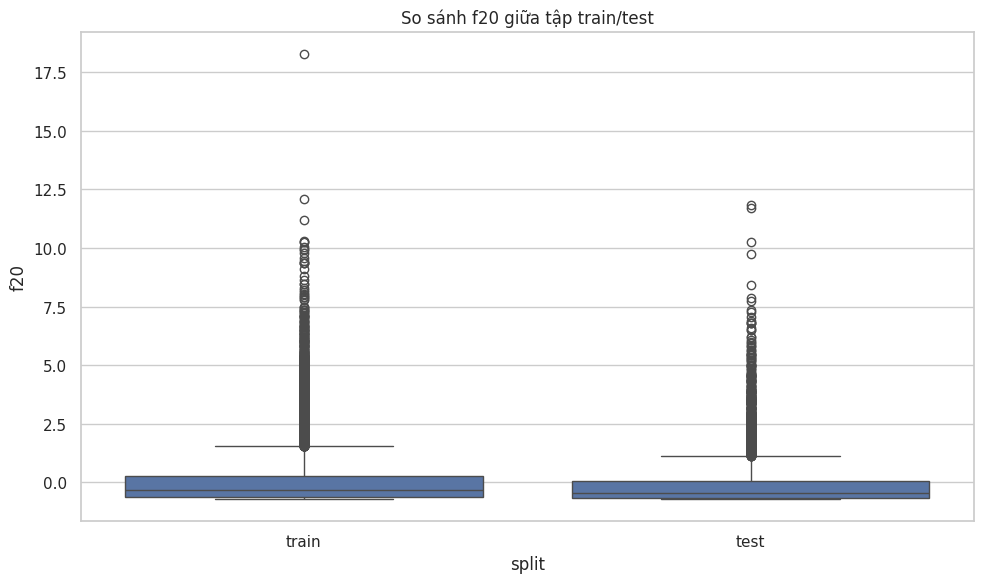

In [ ]:
# Hiển thị trung bình giá trị của các đặc trưng đầu vào theo từng lớp (label)
print("Trung bình đặc trưng theo label:")
display(df.groupby('label')[feature_cols].mean().head())

# Sử dụng boxplot để so sánh phân phối đặc trưng f20 giữa tập train và test
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='split', y='f20')
plt.title("So sánh f20 giữa tập train/test")
plt.tight_layout()
plt.show()

## Phân tích phân phối đa biến bằng biểu đồ Pairplot

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


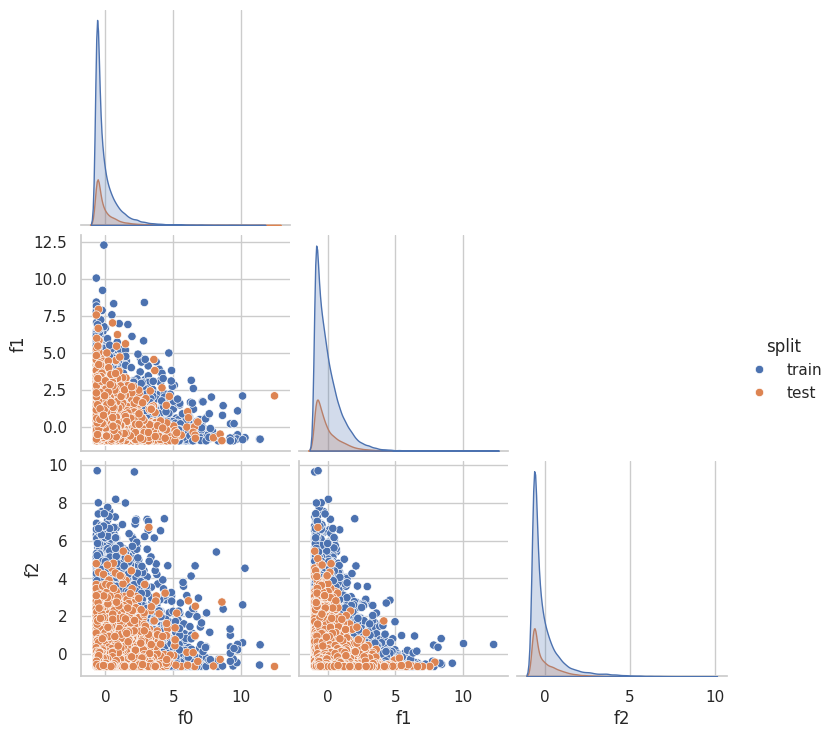

In [11]:
sns.pairplot(df, vars=['f0', 'f1', 'f2'], hue='split', corner=True)
plt.show()

##  Thực hiện PCA để giảm chiều dữ liệu và trực quan hóa

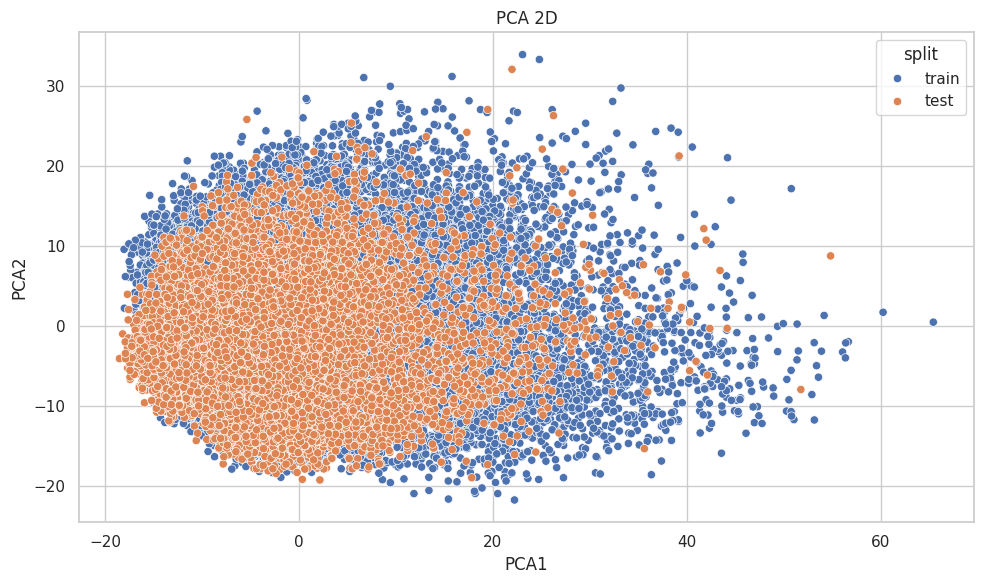

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df[feature_cols])
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

# Scatter plot hiển thị phân phối sau khi giảm chiều bằng PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='split')
plt.title("PCA 2D")
plt.tight_layout()
plt.show()

Xử lí outlier theo IQR

In [13]:
Q1 = df['f0'].quantile(0.25)
Q3 = df['f0'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['f0'] < Q1 - 1.5 * IQR) | (df['f0'] > Q3 + 1.5 * IQR)]
print(f"Số lượng outlier f0 theo IQR: {len(outliers)}")

Số lượng outlier f0 theo IQR: 2818
